In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from google.colab import files
import io

In [ ]:
# Loading the Dataset
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['spam.csv']), encoding='Windows-1252')
data = data[['v1', 'v2']]
# Convert the labels to binary values (0 for ham and 1 for spam)
data = data.rename(columns={'v1': 'label', 'v2': 'message'})

Saving spam.csv to spam (2).csv


In [ ]:
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

X = data['message']
y = data['label']

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
data.describe()

,label
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
data.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
0        4825   4516                             Sorry, I'll call later   30
1         747    653  Please call our customer service representativ...    4

In [ ]:
#Calculating the lenght of all the messages
data['lenght']=data['message'].apply(len)
data.head()

,label,message,lenght
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


K Nearest Neighbour

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred)
prec_knn = precision_score(y_test, y_pred)
rec_knn = recall_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)

print('KNN Classifier:')
print(f'Accuracy: {acc_knn:.2f}')
print(f'Precision: {prec_knn:.2f}')
print(f'Recall: {rec_knn:.2f}')
print(f'F1 Score: {f1_knn:.2f}')


KNN Classifier:
Accuracy: 0.91
Precision: 1.00
Recall: 0.35
F1 Score: 0.52


Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred)
prec_rf = precision_score(y_test, y_pred)
rec_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)

print('Random Forest Classifier:')
print(f'Accuracy: {acc_rf:.2f}')
print(f'Precision: {prec_rf:.2f}')
print(f'Recall: {rec_rf:.2f}')
print(f'F1 Score: {f1_rf:.2f}')


Random Forest Classifier:
Accuracy: 0.98
Precision: 1.00
Recall: 0.84
F1 Score: 0.91


Naive Bayes

In [ ]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

acc_nb = accuracy_score(y_test, y_pred)
prec_nb = precision_score(y_test, y_pred)
rec_nb = recall_score(y_test, y_pred)
f1_nb = f1_score(y_test, y_pred)

print('Naive Bayes Classifier:')
print(f'Accuracy: {acc_nb:.2f}')
print(f'Precision: {prec_nb:.2f}')
print(f'Recall: {rec_nb:.2f}')
print(f'F1 Score: {f1_nb:.2f}')


Naive Bayes Classifier:
Accuracy: 0.96
Precision: 1.00
Recall: 0.72
F1 Score: 0.84


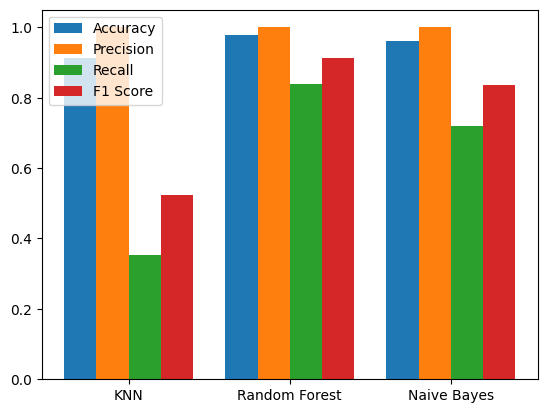

In [ ]:
classifiers = ['KNN', 'Random Forest', 'Naive Bayes']
accuracy = [acc_knn, acc_rf, acc_nb]
precision = [prec_knn, prec_rf, prec_nb]
recall = [rec_knn, rec_rf, rec_nb]
f1 = [f1_knn, f1_rf, f1_nb]

x = range(len(classifiers))
width = 0.2

plt.bar(x, accuracy, width, label='Accuracy')
plt.bar([i + width for i in x], precision, width, label='Precision')
plt.bar([i + width*2 for i in x], recall, width, label='Recall')
plt.bar([i + width*3 for i in x], f1, width, label='F1 Score')

plt.xticks([i + width*1.5 for i in x], classifiers)
plt.legend()
plt.show()


In [ ]:
# User input
user_input = input('Enter a message: ')
user_input_tfidf = vectorizer.transform([user_input])
user_pred = knn.predict(user_input_tfidf)
if user_pred == 0:
    print('The message is not spam.')
else:
    print('The message is spam.')

Enter a message: this is spam 565565
The message is not spam.


In [ ]:
# import chardet
# with open("sample.csv", 'rb') as rawdata:
#     result = chardet.detect(rawdata.read(100000))
# result